# Bank Marketing

In [40]:
import pandas as pd
import matplotlib as mtp


bankmarketing_dataset = pd.read_csv('data/bank_marketing/bank-marketing-raw.csv', sep=";")

bankmarketing_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [41]:
print("Tipos de dados de cada coluna")
print(bankmarketing_dataset.dtypes)

print("Quantidade de valores Nulos por coluna")
null_counts= bankmarketing_dataset.isnull().sum()
print(null_counts)

print('Contagem de valores "unknown" em todas as colunas')
unknown_counts = bankmarketing_dataset.apply(lambda x: (x == 'unknown').sum())
print(unknown_counts)


Tipos de dados de cada coluna
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
Quantidade de valores Nulos por coluna
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Contagem de valores "unknown" em todas as colunas
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays       

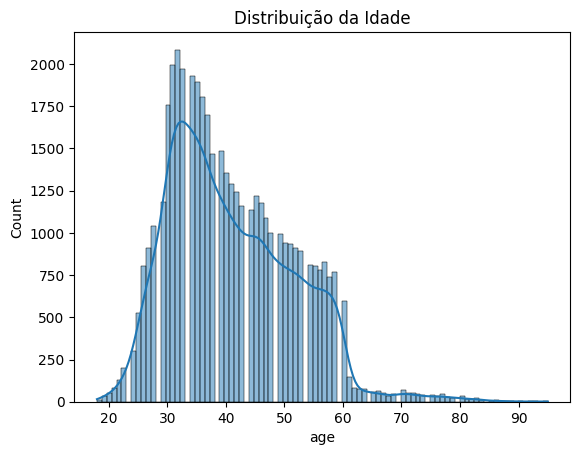

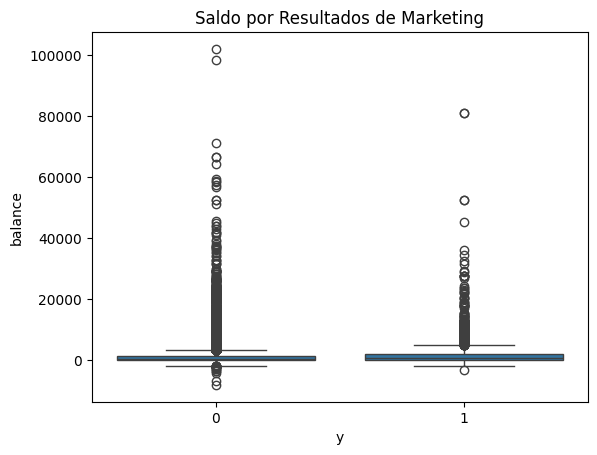

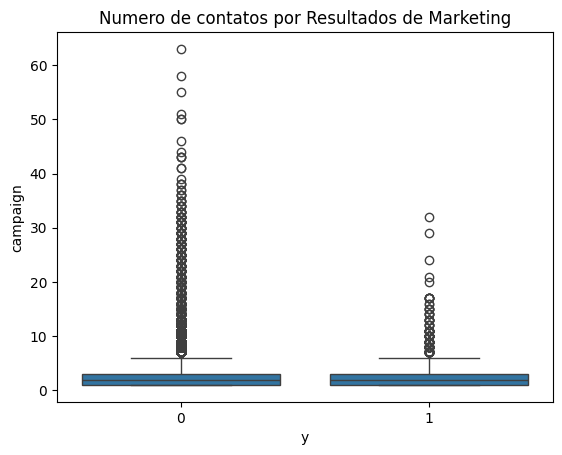

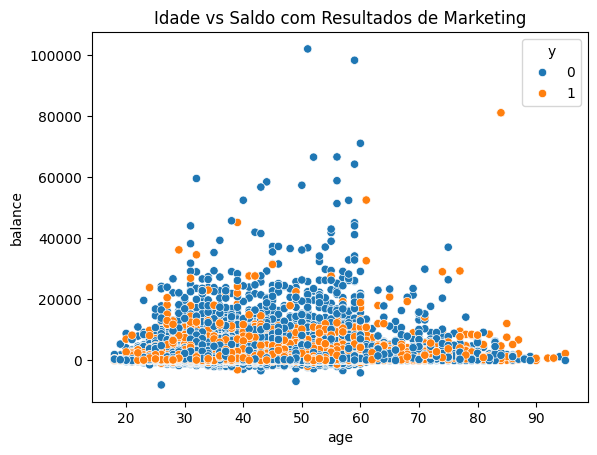

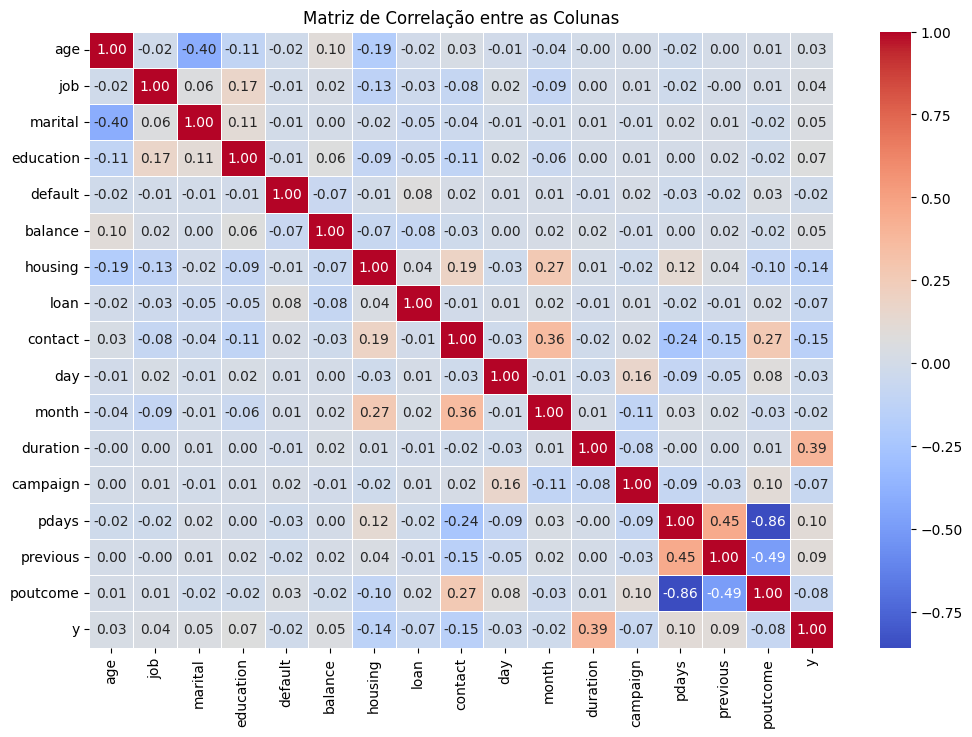

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Histograma para a variável 'age'
sns.histplot(bankmarketing_dataset['age'], kde=True)
plt.title('Distribuição da Idade')
plt.show()

# Boxplot de 'balance' por 'y' (se comprou ou não)
sns.boxplot(x='y', y='balance', data=bankmarketing_dataset)
plt.title('Saldo por Resultados de Marketing')
plt.show()

# Boxplot de 'Campaign' por 'y' (se comprou ou não)
sns.boxplot(x='y', y='campaign', data=bankmarketing_dataset)
plt.title('Numero de contatos por Resultados de Marketing')
plt.show()

# Gráfico de dispersão entre 'age' e 'balance' com 'y' como hue
sns.scatterplot(x='age', y='balance', hue='y', data=bankmarketing_dataset)
plt.title('Idade vs Saldo com Resultados de Marketing')
plt.show()

# Identificar colunas categóricas (com valores não numéricos)
categorical_columns = bankmarketing_dataset.select_dtypes(include=['object']).columns

# Usar LabelEncoder para converter as colunas categóricas para numéricas
label_encoder = LabelEncoder()
for col in categorical_columns:
    bankmarketing_dataset[col] = label_encoder.fit_transform(bankmarketing_dataset[col])

# Calcular a matriz de correlação
corr_matrix = bankmarketing_dataset.corr()

# Configurar o gráfico
plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Exibir o gráfico
plt.title('Matriz de Correlação entre as Colunas')
plt.show()


### Resumo das Colunas:

| Coluna     | Tipo de Dados | Descrição                                                                 |
|------------|---------------|---------------------------------------------------------------------------|
| age        | int64         | Idade do cliente                                                          |
| job        | object        | Ocupação do cliente                                                       |
| marital    | object        | Estado civil do cliente (casado, solteiro, divorciado)                   |
| education  | object        | Nível educacional do cliente                                              |
| default    | object        | Indica se o cliente possui crédito em atraso                              |
| balance    | float64       | Saldo bancário do cliente                                                 |
| housing    | object        | Indica se o cliente possui empréstimo habitacional                        |
| loan       | object        | Indica se o cliente possui empréstimo pessoal                             |
| contact    | object        | Meio de comunicação utilizado para contatar o cliente                     |
| day        | int64         | Dia do mês em que o cliente foi contatado                                 |
| month      | object        | Mês em que o cliente foi contatado                                        |
| duration   | int64         | Duração da última chamada (em segundos)                                   |
| campaign   | int64         | Número de contatos realizados durante a campanha                          |
| pdays      | int64         | Número de dias desde o último contato (999 se nunca contatado)           |
| previous   | int64         | Número de contatos anteriores                                             |
| poutcome   | object        | Resultado da última campanha (sucesso, falha, inexistente)                |
| target     | object        | Se o cliente subscreveu (sim) ou não (não) o depósito a prazo             |

### Observações:

- O atributo **target** indica se o cliente subscreveu ou não o depósito a prazo (alvo da campanha de marketing).
- Algumas colunas, como **pdays**, utilizam o valor 999 para representar "nunca foi contatado". Esse valor pode ser tratado como um valor nulo (NaN) ao fazer a análise ou a modelagem.

### Procedimentos:

- **Codificação das Variáveis Categóricas**: One-Hot Encoding
- **Tratamento de Valores Nulos**: Algumas colunas podem conter valores nulos ou a string "unknown". Será necessário tratar esses valores adequadamente (como substituindo-os por valores medianos, moda ou descartando-os).
- **Escalonamento**: Variáveis como `balance`, `duration` e `age` são numéricas e podem precisar ser escalonadas.


# Premier League Matches